<a href="https://colab.research.google.com/github/pragneshrana/MLFlow/blob/main/MLFlowTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
import warnings
import argparse
import logging
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import mlflow
import mlflow.sklearn
from pathlib import Path
import os

os.mkdir("data/") #directory to store the data :train, test,

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

# # get arguments from command
# parser = argparse.ArgumentParser()
# parser.add_argument("--alpha", type=float, required=False, default=0.7)
# parser.add_argument("--l1_ratio", type=float, required=False, default=0.7)
# args = parser.parse_args()






In [ ]:
# evaluation function
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2




In [ ]:
warnings.filterwarnings("ignore")
np.random.seed(40)

# Read the wine-quality csv file from local
path = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
data = pd.read_csv(path)


In [ ]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")

# The predicted column is "quality" which is a scalar from [3, 9]
train_x = train.drop(["quality"], axis=1)
test_x = test.drop(["quality"], axis=1)
train_y = train[["quality"]]
test_y = test[["quality"]]

In [ ]:
# alpha = args.alpha
# l1_ratio = args.l1_ratio

alpha = 0.9
l1_ratio = 0.25



In [ ]:
mlflow.set_tracking_uri(uri="")

print("The set tracking uri is ", mlflow.get_tracking_uri())

# Setting experiment ids -- Setting or creating experiment
exp = mlflow.set_experiment(experiment_name="experiment_2")
#get_exp = mlflow.get_experiment(exp_id)

print("Name: {}".format(exp.name))
print("Experiment_id: {}".format(exp.experiment_id))
print("Artifact Location: {}".format(exp.artifact_location))
print("Tags: {}".format(exp.tags))
print("Lifecycle_stage: {}".format(exp.lifecycle_stage))
print("Creation timestamp: {}".format(exp.creation_time))



The set tracking uri is  
Name: experiment_2
Experiment_id: 434872774018137272
Artifact Location: file:///content/mlruns/434872774018137272
Tags: {}
Lifecycle_stage: active
Creation timestamp: 1710483524887


In [ ]:
#Started tracking here
mlflow.start_run()

#training model
lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
lr.fit(train_x, train_y)

predicted_qualities = lr.predict(test_x)

(rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

print("Elasticnet model (alpha={:f}, l1_ratio={:f}):".format(alpha, l1_ratio))
print("  RMSE: %s" % rmse)
print("  MAE: %s" % mae)
print("  R2: %s" % r2)

#logging parameters
params ={
    "alpha": alpha,
    "l1_ratio": l1_ratio
}
mlflow.log_params(params)

#logging metrics
metrics = {
    "rmse":rmse,
    "r2":r2,
    "mae":mae
}
mlflow.log_metrics(metrics)

#logging model
mlflow.sklearn.log_model(lr, "my_new_model_1")

#logging artifcats, here store files in data
mlflow.log_artifacts("data/")

#
artifacts_uri=mlflow.get_artifact_uri()
print("The artifact path is",artifacts_uri )

mlflow.end_run() #ended tracking

#Getting last run details
run = mlflow.last_active_run()
print("Active run id is {}".format(run.info.run_id))
print("Active run name is {}".format(run.info.run_name))

Elasticnet model (alpha=0.900000, l1_ratio=0.250000):
  RMSE: 0.7005290242726819
  MAE: 0.5807136894841896
  R2: 0.15111414314403093
The artifact path is file:///content/mlruns/434872774018137272/d4b47512b28a43c3adad8fd09b832dd4/artifacts
Active run id is d4b47512b28a43c3adad8fd09b832dd4
Active run name is puzzled-frog-56


### Setting up UI for visulization

In [18]:

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2deDLSIvhkTLbHJffktozxuBO7k_3GfgePGB97h6NN946iyWF"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://1441-34-133-98-51.ngrok-free.app


### Important functions


```
set_tracking_uri() : Set the tracking uri of choices for the current run
get_tracking_uri() : Get the tracking uri

create_experiment() :  create a fresh new experiment
set_experiment() : set already created experiment -- if create does not exist then set will work as create

## Loggign Function
start_run() :  Starts a new MLflow run under which all the entities will be logged
end_run() : end the active run
active_run() : Returns the run which is active now
last_active_run() : Gets the most recent active run

mlflow.log_param(s) : log hyper-parameter as key-value pair
mlflow.log_metric(s) : log metric as key-value pair
mlflow.log_artifact(s) : log directory/files
mlflow.get_artifacts_uri(s) : Get abosulte uri of the specified artifactsin the currently active run

mlflow.set_tag(s): set tag(s) under the current run

```

### System tags



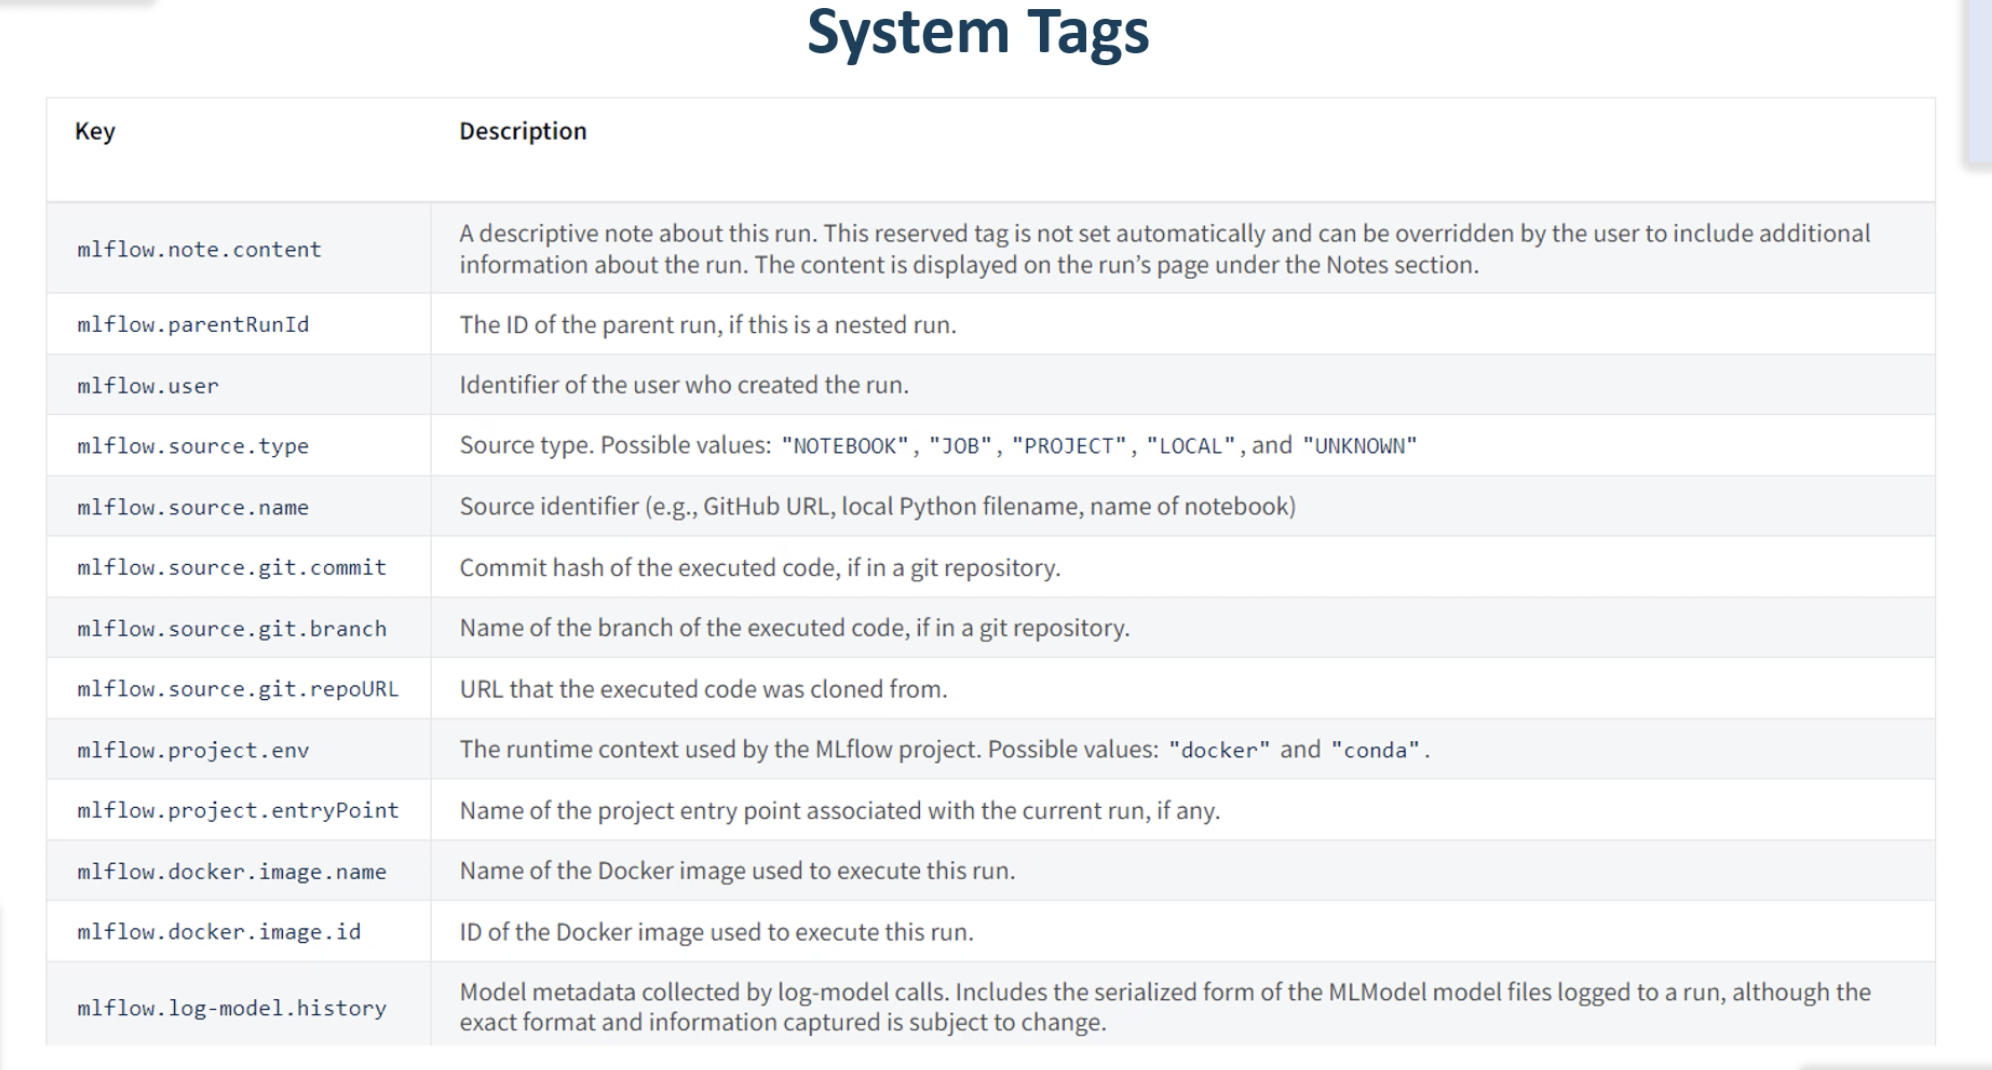